In [18]:
import requests
import time
import re

In [20]:
def extract_id(text):
    match = re.search(r"-(.*?)-", text)
    return match.group(1) if match else None

In [23]:
def analyze_url_virustotal(url, api_key):
    """
    Envía una URL a VirusTotal para análisis y devuelve un informe de seguridad.

    :param url: URL sospechosa a analizar.
    :param api_key: Clave de API de VirusTotal.
    :return: Informe con resultado del análisis.
    """
    vt_url = "https://www.virustotal.com/api/v3/urls"
    headers = {"x-apikey": api_key}

    response = requests.post(vt_url, headers=headers, data={"url": url})
    if response.status_code != 200:
        return {"error": "Error en la solicitud a VirusTotal", "status": response.status_code}

    analysis_id = response.json()["data"]["id"]
    result_url = f"https://www.virustotal.com/api/v3/analyses/{analysis_id}"

    for _ in range(10):
        result_response = requests.get(result_url, headers=headers)
        if result_response.status_code == 200:
            analysis_data = result_response.json()
            stats = analysis_data["data"]["attributes"]["stats"]

            return {
                "malicious": stats.get("malicious", 0),
                "suspicious": stats.get("suspicious", 0),
                "harmless": stats.get("harmless", 0),
                "undetected": stats.get("undetected", 0),
                "result_url": f"https://www.virustotal.com/gui/url/{extract_id(analysis_id)}"
            }
        time.sleep(3)

    return {"error": "No se pudo obtener el resultado del análisis a tiempo"}

In [24]:
API_KEY = "cadb4c85737f83502d3f61829e41f4afdbca1a5937f3b0d24755776fea66c144"
url_sospechosa = "http://115.55.192.101:59012/bin.sh"
resultado = analyze_url_virustotal(url_sospechosa, API_KEY)
print(resultado)

{'malicious': 1, 'suspicious': 0, 'harmless': 65, 'undetected': 30, 'result_url': 'https://www.virustotal.com/gui/url/319aca32e31070c0568663e643de2d21d2ec35268c11bb2d567562cdb0745b90'}


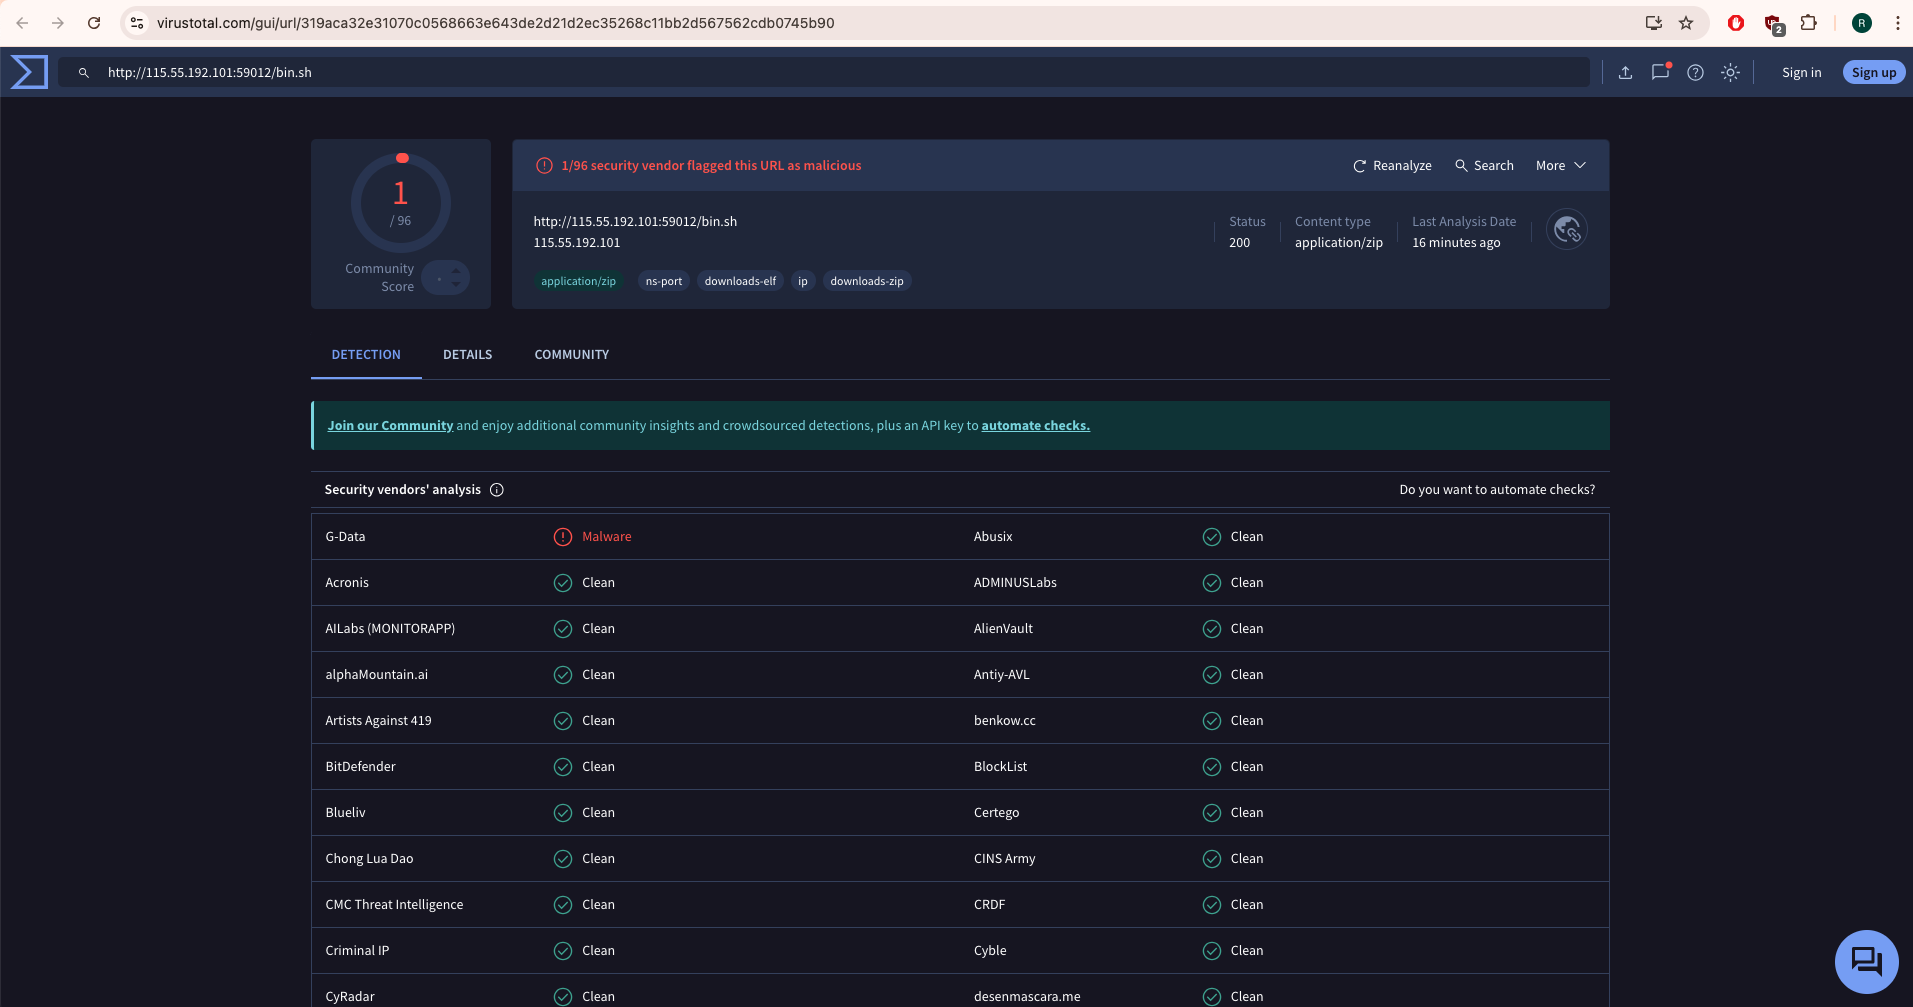